In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
col = pd.read_csv('CovidColombia.csv', usecols= ['Fecha de notificación',
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia',
       'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado',
       'Tipo recuperación'],date_parser= ['Fecha de notificación','Fecha de muerte', 'Fecha diagnostico',
       'Fecha recuperado'], low_memory = False)

# Luis Evelio García Restrepo MD, MAS, EF

## Seguimiento COVID-19   
### Pendiente depuración muertes "por" o "con" COVID-19

### Tasas de letalidad y de mortalidad 

In [4]:
fecha = col['Fecha de notificación'].max()

#### Período del '2020 - 03 - 02' al 

In [5]:
FECHA = fecha.rstrip('T00:00:00.000')
FECHA


'2020-09-17'


#### Departamentos de Colombia
#### Fuentes:   

#### Base de datos Instituto Nacional de Salud Colombiano INS   -  Departamento Administrativo Nacional de Estadística -DANE.

In [6]:
col[['Fecha de notificación',
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia',
       'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado',
       'Tipo recuperación']]=  col[['Fecha de notificación',
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia',
       'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado',
       'Tipo recuperación']].astype('category')

In [7]:
Tasas = col.groupby('Departamento o Distrito ')[['Fecha de notificación','Fecha de muerte']].count()

In [8]:
Tasas.rename(columns={'Fecha de notificación': 'Número de casos', 'Fecha de muerte': 'Fallecidos'}, inplace= True)

In [9]:
Tasas['Tasa de letalidad por cien enfermos'] = (Tasas['Fallecidos']/Tasas['Número de casos'])*100

In [10]:
poblacion= pd.read_csv('Dane2018_2023.csv', usecols= ['Dpto','Municipio','Género','2020'])

In [11]:
habitantes = poblacion.loc[poblacion['Género']== 'AMBOS SEXOS', ['Dpto', 'Municipio','2020']].groupby('Dpto')['2020'].sum()


In [12]:
Tasas['Tasa de mortalidad por millón de habitantes'] = (Tasas['Fallecidos']/habitantes)*1000000

In [13]:
Tasas.round(2).sort_values('Tasa de mortalidad por millón de habitantes', ascending=False)

,Número de casos,Fallecidos,Tasa de letalidad por cien enfermos,Tasa de mortalidad por millón de habitantes
Departamento o Distrito,,,,
Amazonas,2728,120,4.40,1518.60
Barranquilla D.E.,37392,1758,4.70,1379.64
Atlántico,28904,1433,4.96,989.72
Bogotá D.C.,247233,6826,2.76,881.46
Córdoba,22452,1583,7.05,865.53
Santa Marta D.T. y C.,9504,428,4.50,794.64
Caquetá,7387,287,3.89,699.11
Sucre,13417,573,4.27,603.63
Cartagena D.T. y C.,22282,570,2.56,554.08


# Luis Evelio García Restrepo MD, MAS, EF

## Seguimiento COVID-19   
### Pendiente depuración muertes "por" o "con" COVID-19

### Tasa de Mortalidad por millón de habitantes por departamentos

#### Período del '2020 - 03 - 02' al 

In [14]:
FECHA

'2020-09-17'

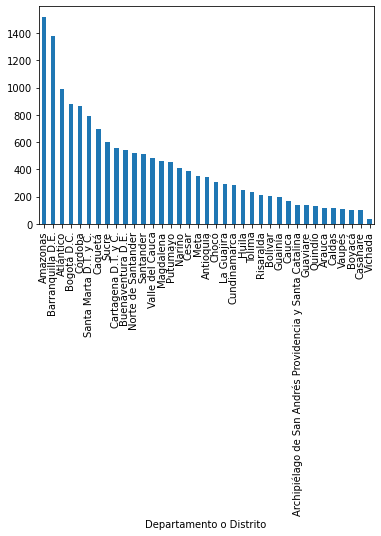

In [15]:
Tasas.loc[:,'Tasa de mortalidad por millón de habitantes'].sort_values(ascending=False).plot(kind='bar')

In [16]:
departamentos = []
dept = ''
while dept != 'F' or dept != 'f':
    dept = input("Ingrese los departamentos para los que requiere conocer la tasa.   Para terminar, digite 'F'   :")
    if dept == 'F' or dept == 'f':
        break
    else:
        if Tasas.index.isin([dept]).any()==True:
            departamentos.append(dept)
        else:
            print('No se encuentra el departamento.  Revise ortografía.  Para Distrito capitales, turísticos o especiales puede requerir D.C., D.E. o D.T.')


Ingrese los departamentos para los que requiere conocer la tasa.   Para terminar, digite 'F'   :Caldas
Ingrese los departamentos para los que requiere conocer la tasa.   Para terminar, digite 'F'   :Quindío 
No se encuentra el departamento.  Revise ortografía.  Para Distrito capitales, turísticos o especiales puede requerir D.C., D.E. o D.T.
Ingrese los departamentos para los que requiere conocer la tasa.   Para terminar, digite 'F'   :Quindío
Ingrese los departamentos para los que requiere conocer la tasa.   Para terminar, digite 'F'   :Risaralda
Ingrese los departamentos para los que requiere conocer la tasa.   Para terminar, digite 'F'   :f


In [17]:
departamento = pd.concat([Tasas,habitantes], axis=1).loc[departamentos,:].round(2)
cuadro_dptos = departamento

# Luis Evelio García Restrepo MD, MAS, EF

## Seguimiento COVID-19   
### Pendiente depuración muertes "por" o "con" COVID-19

### Tasas de letalidad y de mortalidad

#### Período del '2020 - 03 - 02' al 

In [18]:
FECHA

'2020-09-17'


#### Selección Departamentos de Colombia
#### Fuentes:   

#### Base de datos Instituto Nacional de Salud Colombiano INS   -  Departamento Administrativo Nacional de Estadística -DANE.

In [19]:
cuadro_dptos.rename(columns={'2020':'Población'}, inplace=True)

In [20]:
cuadro_dptos.sort_values('Tasa de mortalidad por millón de habitantes', ascending=False, inplace=True)
cuadro_dptos

,Número de casos,Fallecidos,Tasa de letalidad por cien enfermos,Tasa de mortalidad por millón de habitantes,Población
Risaralda,9105.0,201.0,2.21,209.15,961055
Quindío,2368.0,74.0,3.12,133.24,555401
Caldas,4380.0,120.0,2.74,117.83,1018453


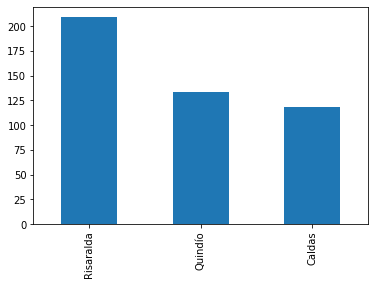

In [21]:
cuadro_dptos.loc[:,'Tasa de mortalidad por millón de habitantes'].sort_values(ascending=False).plot(kind='bar')